## 初始化

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # 导入模块
import pandas as pd
sns.set() # 设置美化参数，一般默认就好

def smooth(d, sm=1):
    # 对单行数据平滑处理
    smooth_data = []
    if sm > 1:
        z = np.ones(len(d))
        y = np.ones(sm)*1.0
        d = np.convolve(y, d, "same")/np.convolve(y, z, "same")
        smooth_data=d
    return smooth_data


## 绘制平地实验图像

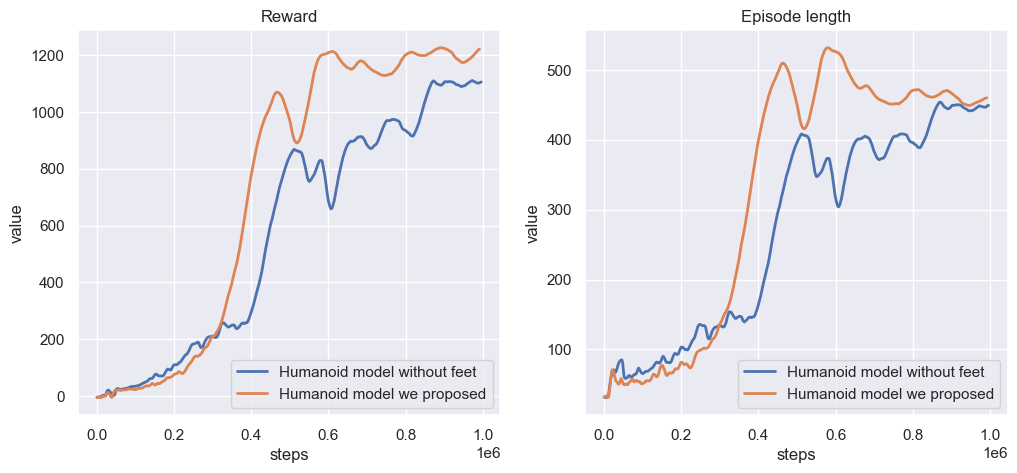

In [25]:

default_nofeet_eplen ="tensorboard_log\\HumanoidCustomEnv-v0\\flat_floor_no_evo\\run-1e6_default_nofeet_cpu10_sac_HumanoidCustomEnv-v0_1e6_default_nofeet_cpu10_sac_HumanoidCustomEnv-v0_2-tag-rollout_ep_len_mean.csv"
default_nofeet_reward = "tensorboard_log\\HumanoidCustomEnv-v0\\flat_floor_no_evo\\run-1e6_default_nofeet_cpu10_sac_HumanoidCustomEnv-v0_1e6_default_nofeet_cpu10_sac_HumanoidCustomEnv-v0_2-tag-rollout_ep_rew_mean.csv"
default_eplen = "tensorboard_log\\HumanoidCustomEnv-v0\\flat_floor_no_evo\\run-1e6_default_t2_cpu10_sac_HumanoidCustomEnv-v0_1e6_default_t2_cpu10_sac_HumanoidCustomEnv-v0_2-tag-rollout_ep_len_mean.csv"
default_reward = "tensorboard_log\\HumanoidCustomEnv-v0\\flat_floor_no_evo\\run-1e6_default_t2_cpu10_sac_HumanoidCustomEnv-v0_1e6_default_t2_cpu10_sac_HumanoidCustomEnv-v0_2-tag-rollout_ep_rew_mean.csv"

default_nofeet_eplen_data = pd.read_csv(default_nofeet_eplen)
default_nofeet_reward_data = pd.read_csv(default_nofeet_reward)
default_eplen_data = pd.read_csv(default_eplen)
default_reward_data = pd.read_csv(default_reward)

smooth_num = 10

f1_steps = np.array(smooth(default_nofeet_reward_data["Step"][:],sm=smooth_num))
f2_steps = np.array(smooth(default_reward_data["Step"][:],sm=smooth_num))
f1_rewards = np.array(smooth(default_nofeet_reward_data["Value"][:],sm=smooth_num))
f2_rewards = np.array(smooth(default_reward_data["Value"][:],sm=smooth_num))
plt.figure(1,figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(f1_steps, f1_rewards,linewidth = 2)
plt.plot(f2_steps, f2_rewards,linewidth = 2)
plt.title("Reward")
plt.xlabel('steps')
plt.ylabel('value')
plt.legend(["Humanoid model without feet","Humanoid model we proposed"])
f1_steps = np.array(smooth(default_nofeet_eplen_data["Step"][:],sm=smooth_num))
f2_steps = np.array(smooth(default_eplen_data["Step"][:],sm=smooth_num))
f1_eplen = np.array(smooth(default_nofeet_eplen_data["Value"][:],sm=smooth_num))
f2_eplen = np.array(smooth(default_eplen_data["Value"][:],sm=smooth_num))
plt.subplot(1,2,2)
plt.plot(f1_steps, f1_eplen,linewidth = 2)
plt.plot(f2_steps, f2_eplen,linewidth = 2)
plt.title("Episode length")
plt.xlabel('steps')
plt.ylabel('value')
plt.legend(["Humanoid model without feet","Humanoid model we proposed"])

plt.savefig(f'screenshot/flatfloor_exp_compare.png', dpi=400)
plt.show()

<AxesSubplot: xlabel='Step', ylabel='Value'>

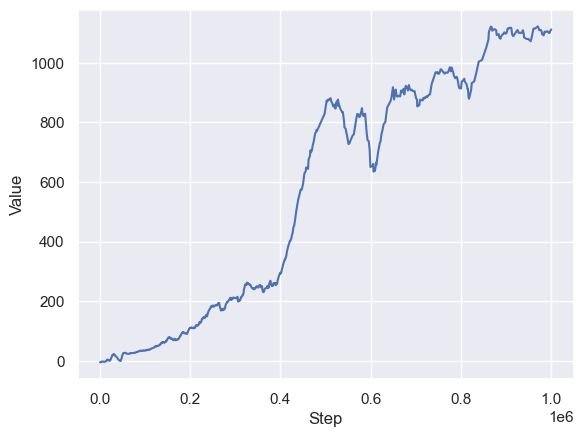

In [18]:
sns.lineplot(x="Step", y="Value",data=default_nofeet_reward_data)
sns.lineplot(x="Step", y="Value",data=default_nofeet_reward_data)

    episode  loss   algo
0         0    18  algo1
1         0    20  algo1
2         0    20  algo1
3         1    20  algo1
4         1    17  algo1
..      ...   ...    ...
16        5     4  algo4
17        5     2  algo4
18        6    12  algo4
19        6     1  algo4
20        6     0  algo4

[84 rows x 3 columns]


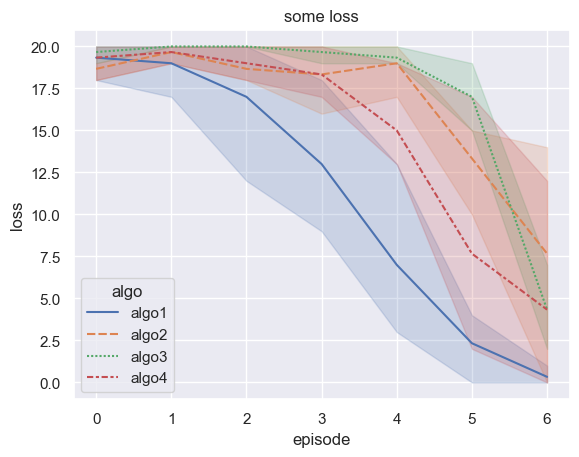

In [15]:
import seaborn as sns 
sns.set()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def get_data():
    '''获取数据
    '''
    basecond = np.array([[18, 20, 19, 18, 13, 4, 1],[20, 17, 12, 9, 3, 0, 0],[20, 20, 20, 12, 5, 3, 0]])
    cond1 = np.array([[18, 19, 18, 19, 20, 15, 14],[19, 20, 18, 16, 20, 15, 9],[19, 20, 20, 20, 17, 10, 0]])
    cond2 = np.array([[20, 20, 20, 20, 19, 17, 4],[20, 20, 20, 20, 20, 19, 7],[19, 20, 20, 19, 19, 15, 2]])
    cond3 = np.array([[20, 20, 20, 20, 19, 17, 12],[18, 20, 19, 18, 13, 4, 1], [20, 19, 18, 17, 13, 2, 0]])
    return basecond, cond1, cond2, cond3

data = get_data()
label = ['algo1', 'algo2', 'algo3', 'algo4']
df=[]
for i in range(len(data)):
    df.append(pd.DataFrame(data[i]).melt(var_name='episode',value_name='loss'))
    df[i]['algo']= label[i]
df=pd.concat(df) # 合并
print(df)
sns.lineplot(x="episode", y="loss", hue="algo", style="algo",data=df)
plt.title("some loss")
plt.show()


# 绘制楼梯实验图像

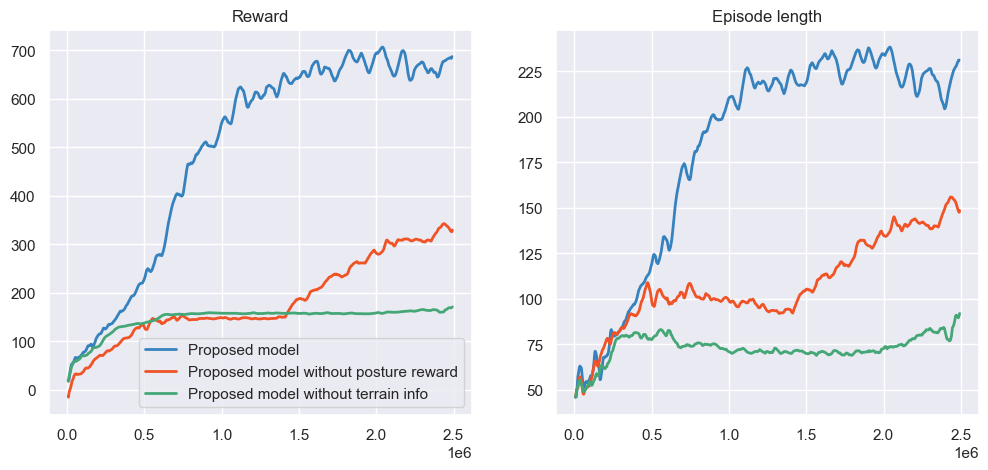

In [24]:

normal_eplen ="tensorboard_log\\steps_experiments_v1\\run-normal_steps_no_evo_1-tag-rollout_ep_len_mean.csv"
normal_reward = "tensorboard_log\\steps_experiments_v1\\run-normal_steps_no_evo_1-tag-rollout_ep_rew_mean.csv"
no_postureR_eplen = "tensorboard_log\\steps_experiments_v1\\run-steps_no_poseture_R_1-tag-rollout_ep_len_mean.csv"
no_postureR_reward = "tensorboard_log\\steps_experiments_v1\\run-steps_no_poseture_R_1-tag-rollout_ep_rew_mean.csv"
no_terrain_info_eplen = "tensorboard_log\\steps_experiments_v1\\run-steps_no_terrain_info_1-tag-rollout_ep_len_mean.csv"
no_terrain_info_reward = "tensorboard_log\\steps_experiments_v1\\run-steps_no_terrain_info_1-tag-rollout_ep_rew_mean.csv"

normal_eplen_data = pd.read_csv(normal_eplen)
normal_reward_data = pd.read_csv(normal_reward)
no_postureR_eplen_data = pd.read_csv(no_postureR_eplen)
no_postureR_reward_data = pd.read_csv(no_postureR_reward)
no_terrain_info_eplen_data = pd.read_csv(no_terrain_info_eplen)
no_terrain_info_reward_data = pd.read_csv(no_terrain_info_reward)

smooth_num = 15

a=smooth(normal_reward_data["Step"][:], sm = smooth_num)
f1_steps = np.array(smooth(normal_reward_data["Step"][:], sm = smooth_num))
f2_steps = np.array(smooth(no_postureR_reward_data["Step"][:], sm = smooth_num))
f3_steps = np.array(smooth(no_terrain_info_reward_data["Step"][:], sm = smooth_num))
f1_rewards = np.array(smooth(normal_reward_data["Value"][:], sm = smooth_num))
f2_rewards = np.array(smooth(no_postureR_reward_data["Value"][:], sm = smooth_num))
f3_rewards = np.array(smooth(no_terrain_info_reward_data["Value"][:], sm = smooth_num))
'''
f1_steps = np.array(normal_reward_data["Step"][:])
f2_steps = np.array(no_postureR_reward_data["Step"][:])
f3_steps = np.array(no_terrain_info_reward_data["Step"][:])
f1_rewards = np.array(normal_reward_data["Value"][:])
f2_rewards = np.array(no_postureR_reward_data["Value"][:])
f3_rewards = np.array(no_terrain_info_reward_data["Value"][:])
'''
plt.figure(1,figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(f1_steps, f1_rewards,color='#3682be',linewidth = 2)
plt.plot(f2_steps, f2_rewards,color='#f05326',linewidth = 2)
plt.plot(f3_steps, f3_rewards,color='#45a776',linewidth = 2)
plt.title("Reward")
plt.legend(["Proposed model","Proposed model without posture reward","Proposed model without terrain info"])

'''
f1_steps = np.array(normal_eplen_data["Step"][:])
f2_steps = np.array(no_postureR_eplen_data["Step"][:])
f3_steps = np.array(no_terrain_info_eplen_data["Step"][:])
f1_eplen = np.array(normal_eplen_data["Value"][:])
f2_eplen = np.array(no_postureR_eplen_data["Value"][:])
f3_eplen = np.array(no_terrain_info_eplen_data["Value"][:])
'''

f1_steps = np.array(smooth(normal_eplen_data["Step"][:], sm = smooth_num))
f2_steps = np.array(smooth(no_postureR_eplen_data["Step"][:], sm = smooth_num))
f3_steps = np.array(smooth(no_terrain_info_eplen_data["Step"][:], sm = smooth_num))
f1_eplen = np.array(smooth(normal_eplen_data["Value"][:], sm = smooth_num))
f2_eplen = np.array(smooth(no_postureR_eplen_data["Value"][:], sm = smooth_num))
f3_eplen = np.array(smooth(no_terrain_info_eplen_data["Value"][:], sm = smooth_num))
plt.subplot(1,2,2)
plt.plot(f1_steps, f1_eplen,color='#3682be',linewidth = 2)
plt.plot(f2_steps, f2_eplen,color='#f05326',linewidth = 2)
plt.plot(f3_steps, f3_eplen,color='#45a776',linewidth = 2)
plt.title("Episode length")
#plt.legend(["Proposed model","Proposed model without posture reward","Proposed model without terrain info"])

plt.savefig(f'screenshot/steps_exp_compare_sm{smooth_num}.png', dpi=400)
plt.show()

# 绘制楼梯实验EVO图像 S1

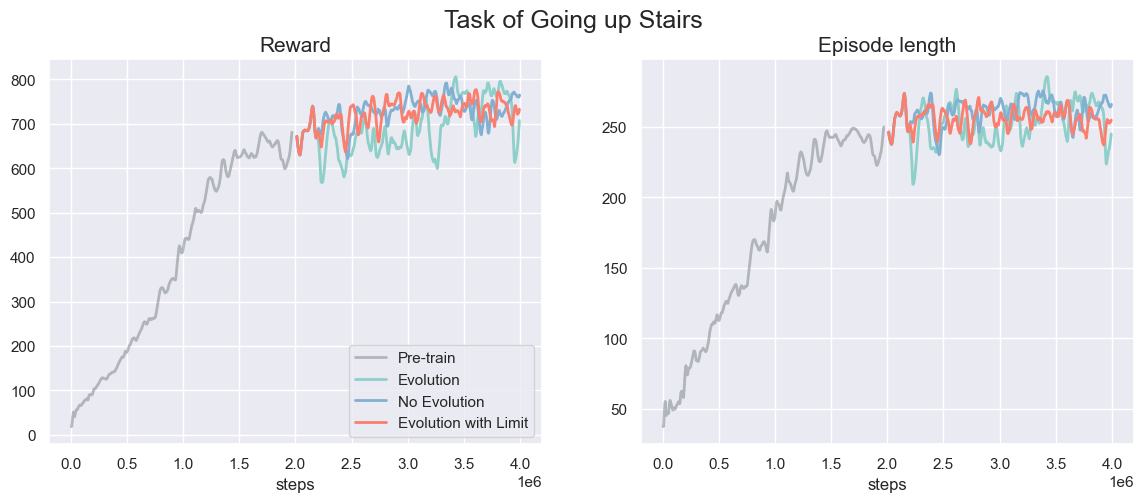

In [9]:
pretrain_eplen = "experiments\\steps_evo_s1\\data\\run-steps_pretrain_2e6_s1_1-tag-rollout_ep_len_mean.csv"
pretrain_reward = "experiments\\steps_evo_s1\\data\\run-steps_pretrain_2e6_s1_1-tag-rollout_ep_rew_mean.csv"

evo_eplen = "experiments\\steps_evo_s1\\data\\run-steps_evo_s1_0-tag-rollout_ep_len_mean.csv"
evo_reward = "experiments\\steps_evo_s1\\data\\run-steps_evo_s1_0-tag-rollout_ep_rew_mean.csv"

noevo_eplen = "experiments\\steps_evo_s1\\data\\run-steps_noevo_s1_0-tag-rollout_ep_len_mean.csv"
noevo_reward = "experiments\\steps_evo_s1\\data\\run-steps_noevo_s1_0-tag-rollout_ep_rew_mean.csv"

evo_punish_eplen = "experiments\\steps_evo_s1\\data\\run-steps_evo_punish_s1_0-tag-rollout_ep_len_mean.csv"
evo_punish_reward = "experiments\\steps_evo_s1\\data\\run-steps_evo_punish_s1_0-tag-rollout_ep_rew_mean.csv"

pretrain_eplen_data = pd.read_csv(pretrain_eplen)
pretrain_reward_data = pd.read_csv(pretrain_reward)
evo_eplen_data = pd.read_csv(evo_eplen)
evo_reward_data = pd.read_csv(evo_reward)
noevo_eplen_data = pd.read_csv(noevo_eplen)
noevo_reward_data = pd.read_csv(noevo_reward)
evo_punish_eplen_data = pd.read_csv(evo_punish_eplen)
evo_punish_reward_data = pd.read_csv(evo_punish_reward)

smooth_num = 15


f1_steps = np.array(smooth(pretrain_reward_data["Step"][:], sm = smooth_num))
f2_steps = np.array(smooth(evo_reward_data["Step"][:], sm = smooth_num))
f3_steps = np.array(smooth(noevo_reward_data["Step"][:], sm = smooth_num))
f4_steps = np.array(smooth(evo_punish_reward_data["Step"][:], sm = smooth_num))
f1_rewards = np.array(smooth(pretrain_reward_data["Value"][:], sm = smooth_num))
f2_rewards = np.array(smooth(evo_reward_data["Value"][:], sm = smooth_num))
f3_rewards = np.array(smooth(noevo_reward_data["Value"][:], sm = smooth_num))
f4_rewards = np.array(smooth(evo_punish_reward_data["Value"][:], sm = smooth_num))
'''
f1_steps = np.array(normal_reward_data["Step"][:])
f2_steps = np.array(no_postureR_reward_data["Step"][:])
f3_steps = np.array(no_terrain_info_reward_data["Step"][:])
f1_rewards = np.array(normal_reward_data["Value"][:])
f2_rewards = np.array(no_postureR_reward_data["Value"][:])
f3_rewards = np.array(no_terrain_info_reward_data["Value"][:])
'''
f = plt.figure(1,figsize=(14, 5))
f.suptitle('Task of Going up Stairs',fontsize=18)
plt.subplot(1,2,1)
plt.plot(f1_steps, f1_rewards,color='#8A919799',linewidth = 2)
plt.plot(f2_steps, f2_rewards,color='#8ECFC9',linewidth = 2)
plt.plot(f3_steps, f3_rewards,color='#82B0D2',linewidth = 2)
plt.plot(f4_steps, f4_rewards,color='#FA7F6F',linewidth = 2)
plt.title("Reward",fontsize=15)
plt.xlabel('steps')
plt.legend(["Pre-train","Evolution","No Evolution", "Evolution with Limit"])

'''
f1_steps = np.array(normal_eplen_data["Step"][:])
f2_steps = np.array(no_postureR_eplen_data["Step"][:])
f3_steps = np.array(no_terrain_info_eplen_data["Step"][:])
f1_eplen = np.array(normal_eplen_data["Value"][:])
f2_eplen = np.array(no_postureR_eplen_data["Value"][:])
f3_eplen = np.array(no_terrain_info_eplen_data["Value"][:])
'''

f1_steps = np.array(smooth(pretrain_eplen_data["Step"][:], sm = smooth_num))
f2_steps = np.array(smooth(evo_eplen_data["Step"][:], sm = smooth_num))
f3_steps = np.array(smooth(noevo_eplen_data["Step"][:], sm = smooth_num))
f4_steps = np.array(smooth(evo_punish_eplen_data["Step"][:], sm = smooth_num))
f1_eplen = np.array(smooth(pretrain_eplen_data["Value"][:], sm = smooth_num))
f2_eplen = np.array(smooth(evo_eplen_data["Value"][:], sm = smooth_num))
f3_eplen = np.array(smooth(noevo_eplen_data["Value"][:], sm = smooth_num))
f4_eplen = np.array(smooth(evo_punish_eplen_data["Value"][:], sm = smooth_num))
plt.subplot(1,2,2)
plt.plot(f1_steps, f1_eplen,color='#8A919799',linewidth = 2)
plt.plot(f2_steps, f2_eplen,color='#8ECFC9',linewidth = 2)
plt.plot(f3_steps, f3_eplen,color='#82B0D2',linewidth = 2)
plt.plot(f4_steps, f4_eplen,color='#FA7F6F',linewidth = 2)
plt.title("Episode length",fontsize=15)
plt.xlabel('steps')
#plt.legend(["Proposed model","Proposed model without posture reward","Proposed model without terrain info"])

plt.savefig(f'screenshot/steps_EVO_expcompare_sm{smooth_num}.png', dpi=400)
plt.show()

## 绘制形态参数变化曲线

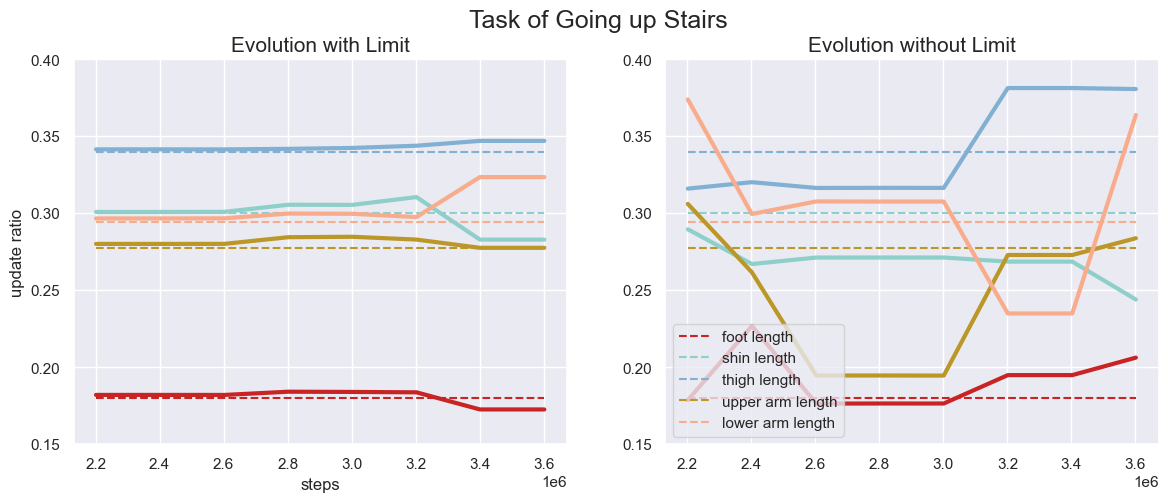

In [10]:

evo_punish_foot = "experiments\\steps_evo_s1\\data\\param\\run-steps_evo_punish_s1_0-tag-design_foot_lenth.csv"
evo_punish_shin = "experiments\\steps_evo_s1\\data\\param\\run-steps_evo_punish_s1_0-tag-design_shin_lenth.csv"
evo_punish_thigh = "experiments\\steps_evo_s1\\data\\param\\run-steps_evo_punish_s1_0-tag-design_thigh_lenth.csv"
evo_punish_upper_arm = "experiments\\steps_evo_s1\\data\\param\\run-steps_evo_punish_s1_0-tag-design_upper_arm_lenth.csv"
evo_punish_lower_arm = "experiments\\steps_evo_s1\\data\\param\\run-steps_evo_punish_s1_0-tag-design_lower_arm_lenth.csv"

evo_foot = "experiments\\steps_evo_s1\\data\\param\\run-steps_evo_s1_0-tag-design_foot_lenth.csv"
evo_shin = "experiments\\steps_evo_s1\\data\\param\\run-steps_evo_s1_0-tag-design_shin_lenth.csv"
evo_thigh = "experiments\\steps_evo_s1\\data\\param\\run-steps_evo_s1_0-tag-design_thigh_lenth.csv"
evo_upper_arm = "experiments\\steps_evo_s1\\data\\param\\run-steps_evo_s1_0-tag-design_upper_arm_lenth.csv"
evo_lower_arm = "experiments\\steps_evo_s1\\data\\param\\run-steps_evo_s1_0-tag-design_lower_arm_lenth.csv"


evo_punish_foot_data = pd.read_csv(evo_punish_foot)
evo_punish_shin_data = pd.read_csv(evo_punish_shin)
evo_punish_thigh_data = pd.read_csv(evo_punish_thigh)
evo_punish_upper_arm_data = pd.read_csv(evo_punish_upper_arm)
evo_punish_lower_arm_data = pd.read_csv(evo_punish_lower_arm)

evo_foot_data = pd.read_csv(evo_foot)
evo_shin_data = pd.read_csv(evo_shin)
evo_thigh_data = pd.read_csv(evo_thigh)
evo_upper_arm_data = pd.read_csv(evo_upper_arm)
evo_lower_arm_data = pd.read_csv(evo_lower_arm)

smooth_num = 15




evo_punish_steps = np.array(evo_punish_foot_data["Step"][:])
#f1_rewards = np.array(normal_reward_data["Value"][:])
#f2_rewards = np.array(no_postureR_reward_data["Value"][:])
#f3_rewards = np.array(no_terrain_info_reward_data["Value"][:])

f = plt.figure(1,figsize=(14, 5))
f.suptitle('Task of Going up Stairs',fontsize=18)
plt.subplot(1,2,1)

linestyle=':'
foot_ori = [0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,]
shin_ori = [0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]
thigh_ori = [0.34,0.34,0.34,0.34,0.34,0.34,0.34,0.34,]
upper_arm_ori = [0.2771,0.2771,0.2771,0.2771,0.2771,0.2771,0.2771,0.2771,]
lower_arm_ori = [0.2944,0.2944,0.2944,0.2944,0.2944,0.2944,0.2944,0.2944,]

plt.plot(evo_punish_steps, foot_ori,linestyle='--',color='#C82423',linewidth = 1.5)
plt.plot(evo_punish_steps, shin_ori,linestyle='--',color='#8ECFC9',linewidth = 1.5)
plt.plot(evo_punish_steps, thigh_ori,linestyle='--',color='#82B0D2',linewidth = 1.5)
plt.plot(evo_punish_steps, upper_arm_ori,linestyle='--',color='#BB9727',linewidth = 1.5)
plt.plot(evo_punish_steps, lower_arm_ori,linestyle='--',color='#F8AC8C',linewidth = 1.5)

plt.plot(evo_punish_steps, evo_punish_foot_data["Value"][:],color='#C82423',linewidth = 3)
plt.plot(evo_punish_steps, evo_punish_shin_data["Value"][:],color='#8ECFC9',linewidth = 3)
plt.plot(evo_punish_steps, evo_punish_thigh_data["Value"][:],color='#82B0D2',linewidth = 3)
plt.plot(evo_punish_steps, evo_punish_upper_arm_data["Value"][:],color='#BB9727',linewidth = 3)
plt.plot(evo_punish_steps, evo_punish_lower_arm_data["Value"][:],color='#F8AC8C',linewidth = 3)
plt.ylim([0.15,0.40])
plt.title("Evolution with Limit",fontsize=15)
plt.xlabel('steps')
plt.ylabel('update ratio')
#plt.legend(["foot length","shin length","thigh length", "upper arm length", "lower arm length"],loc="lower left")

'''
f1_steps = np.array(normal_eplen_data["Step"][:])
f2_steps = np.array(no_postureR_eplen_data["Step"][:])
f3_steps = np.array(no_terrain_info_eplen_data["Step"][:])
f1_eplen = np.array(normal_eplen_data["Value"][:])
f2_eplen = np.array(no_postureR_eplen_data["Value"][:])
f3_eplen = np.array(no_terrain_info_eplen_data["Value"][:])
'''
evo_steps = np.array(evo_foot_data["Step"][:])
plt.subplot(1,2,2)


plt.plot(evo_punish_steps, foot_ori,linestyle='--',color='#C82423',linewidth = 1.5)
plt.plot(evo_punish_steps, shin_ori,linestyle='--',color='#8ECFC9',linewidth = 1.5)
plt.plot(evo_punish_steps, thigh_ori,linestyle='--',color='#82B0D2',linewidth = 1.5)
plt.plot(evo_punish_steps, upper_arm_ori,linestyle='--',color='#BB9727',linewidth = 1.5)
plt.plot(evo_punish_steps, lower_arm_ori,linestyle='--',color='#F8AC8C',linewidth = 1.5)


plt.plot(evo_steps, evo_foot_data["Value"][:],color='#C82423',linewidth = 3)
plt.plot(evo_steps, evo_shin_data["Value"][:],color='#8ECFC9',linewidth = 3)
plt.plot(evo_steps, evo_thigh_data["Value"][:],color='#82B0D2',linewidth = 3)
plt.plot(evo_steps, evo_upper_arm_data["Value"][:],color='#BB9727',linewidth = 3)
plt.plot(evo_steps, evo_lower_arm_data["Value"][:],color='#F8AC8C',linewidth = 3)
plt.ylim([0.15,0.40])
#plt.legend(["foot length","shin length","thigh length", "upper arm length", "lower arm length"])
plt.legend(["foot length","shin length","thigh length", "upper arm length", "lower arm length"],loc="lower left")
plt.title("Evolution without Limit",fontsize=15)
#plt.legend(["Proposed model","Proposed model without posture reward","Proposed model without terrain info"])

plt.savefig(f'screenshot/steps_EVO_design_params.png', dpi=400)
plt.show()

## 绘制速度、成功率柱状图

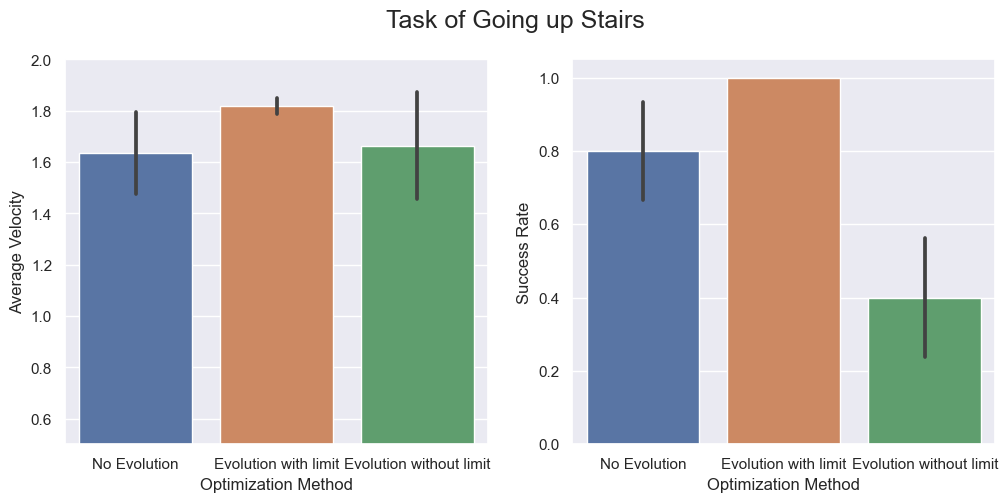

In [30]:
exp_data = pd.read_csv('experiments\\steps_evo_s1\\exp.csv')
#exp_data.head()
#task = exp_data["Task"][:]
f= plt.figure(1,figsize=(12, 5))
f.suptitle('Task of Going up Stairs',fontsize=18)
plt.subplot(1,2,1)
sns.barplot(x="Optimization Method", y="Ave_V", data=exp_data,errorbar="sd") #standard error
plt.ylabel('Average Velocity')
plt.ylim([0.5,2.0])
plt.subplot(1,2,2)
sns.barplot(x="Optimization Method", y="Success", data=exp_data,errorbar="se") #standard error
plt.ylabel('Success Rate')
plt.savefig(f'screenshot/steps_EVO_barplot.png', dpi=500)
plt.show()


# 绘制平地实验EVO图像

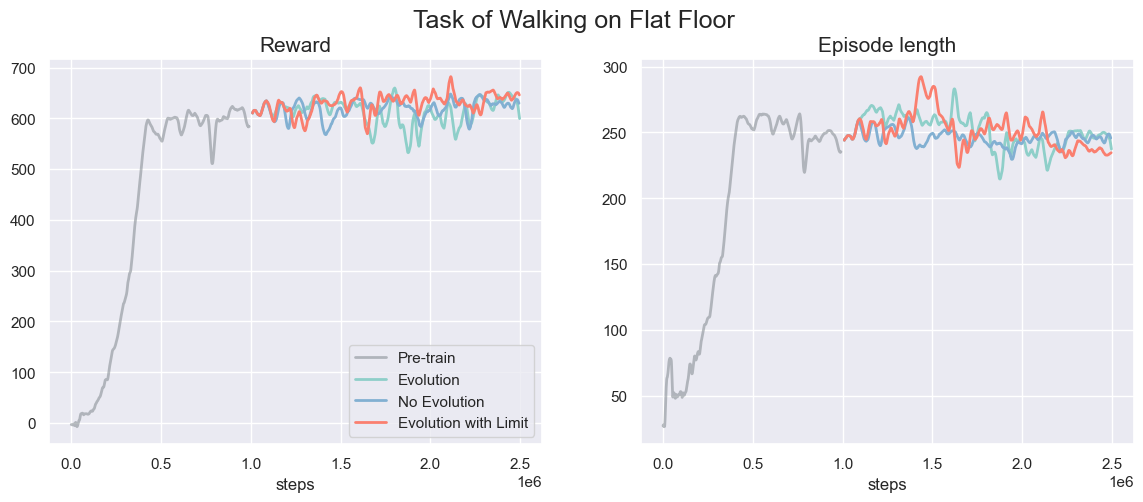

In [8]:


pretrain_eplen = "experiments\\flat_floor_evo_s3\\data\\run-flatfloor_pretrain_1e6_s3_1-tag-rollout_ep_len_mean.csv"
pretrain_reward = "experiments\\flat_floor_evo_s3\\data\\run-flatfloor_pretrain_1e6_s3_1-tag-rollout_ep_rew_mean.csv"

evo_eplen = "experiments\\flat_floor_evo_s3\\data\\run-flatfloor_evo_s3_0-tag-rollout_ep_len_mean.csv"
evo_reward = "experiments\\flat_floor_evo_s3\\data\\run-flatfloor_evo_s3_0-tag-rollout_ep_rew_mean.csv"

noevo_eplen = "experiments\\flat_floor_evo_s3\\data\\run-flatfloor_noevo_s3_0-tag-rollout_ep_len_mean.csv"
noevo_reward = "experiments\\flat_floor_evo_s3\\data\\run-flatfloor_noevo_s3_0-tag-rollout_ep_rew_mean.csv"

evo_punish_eplen = "experiments\\flat_floor_evo_s3\\data\\run-flatfloor_evo_punish_s3_0-tag-rollout_ep_len_mean.csv"
evo_punish_reward = "experiments\\flat_floor_evo_s3\\data\\run-flatfloor_evo_punish_s3_0-tag-rollout_ep_rew_mean.csv"

pretrain_eplen_data = pd.read_csv(pretrain_eplen)
pretrain_reward_data = pd.read_csv(pretrain_reward)
evo_eplen_data = pd.read_csv(evo_eplen)
evo_reward_data = pd.read_csv(evo_reward)
noevo_eplen_data = pd.read_csv(noevo_eplen)
noevo_reward_data = pd.read_csv(noevo_reward)
evo_punish_eplen_data = pd.read_csv(evo_punish_eplen)
evo_punish_reward_data = pd.read_csv(evo_punish_reward)

smooth_num = 15


f1_steps = np.array(smooth(pretrain_reward_data["Step"][:], sm = smooth_num))
f2_steps = np.array(smooth(evo_reward_data["Step"][:], sm = smooth_num))
f3_steps = np.array(smooth(noevo_reward_data["Step"][:], sm = smooth_num))
f4_steps = np.array(smooth(evo_punish_reward_data["Step"][:], sm = smooth_num))
f1_rewards = np.array(smooth(pretrain_reward_data["Value"][:], sm = smooth_num))
f2_rewards = np.array(smooth(evo_reward_data["Value"][:], sm = smooth_num))
f3_rewards = np.array(smooth(noevo_reward_data["Value"][:], sm = smooth_num))
f4_rewards = np.array(smooth(evo_punish_reward_data["Value"][:], sm = smooth_num))
'''
f1_steps = np.array(normal_reward_data["Step"][:])
f2_steps = np.array(no_postureR_reward_data["Step"][:])
f3_steps = np.array(no_terrain_info_reward_data["Step"][:])
f1_rewards = np.array(normal_reward_data["Value"][:])
f2_rewards = np.array(no_postureR_reward_data["Value"][:])
f3_rewards = np.array(no_terrain_info_reward_data["Value"][:])
'''
f = plt.figure(1,figsize=(14, 5))
f.suptitle('Task of Walking on Flat Floor',fontsize=18)
plt.subplot(1,2,1)
plt.plot(f1_steps, f1_rewards,color='#8A919799',linewidth = 2)
plt.plot(f2_steps, f2_rewards,color='#8ECFC9',linewidth = 2)
plt.plot(f3_steps, f3_rewards,color='#82B0D2',linewidth = 2)
plt.plot(f4_steps, f4_rewards,color='#FA7F6F',linewidth = 2)
plt.title("Reward",fontsize=15)
plt.xlabel('steps')
plt.legend(["Pre-train","Evolution","No Evolution", "Evolution with Limit"])

'''
f1_steps = np.array(normal_eplen_data["Step"][:])
f2_steps = np.array(no_postureR_eplen_data["Step"][:])
f3_steps = np.array(no_terrain_info_eplen_data["Step"][:])
f1_eplen = np.array(normal_eplen_data["Value"][:])
f2_eplen = np.array(no_postureR_eplen_data["Value"][:])
f3_eplen = np.array(no_terrain_info_eplen_data["Value"][:])
'''

f1_steps = np.array(smooth(pretrain_eplen_data["Step"][:], sm = smooth_num))
f2_steps = np.array(smooth(evo_eplen_data["Step"][:], sm = smooth_num))
f3_steps = np.array(smooth(noevo_eplen_data["Step"][:], sm = smooth_num))
f4_steps = np.array(smooth(evo_punish_eplen_data["Step"][:], sm = smooth_num))
f1_eplen = np.array(smooth(pretrain_eplen_data["Value"][:], sm = smooth_num))
f2_eplen = np.array(smooth(evo_eplen_data["Value"][:], sm = smooth_num))
f3_eplen = np.array(smooth(noevo_eplen_data["Value"][:], sm = smooth_num))
f4_eplen = np.array(smooth(evo_punish_eplen_data["Value"][:], sm = smooth_num))
plt.subplot(1,2,2)
plt.plot(f1_steps, f1_eplen,color='#8A919799',linewidth = 2)
plt.plot(f2_steps, f2_eplen,color='#8ECFC9',linewidth = 2)
plt.plot(f3_steps, f3_eplen,color='#82B0D2',linewidth = 2)
plt.plot(f4_steps, f4_eplen,color='#FA7F6F',linewidth = 2)
plt.title("Episode length",fontsize=15)
plt.xlabel('steps')
#plt.legend(["Proposed model","Proposed model without posture reward","Proposed model without terrain info"])

plt.savefig(f'screenshot/flatfloor_EVO_expcompare_sm{smooth_num}.png', dpi=400)
plt.show()

## 绘制速度、成功率

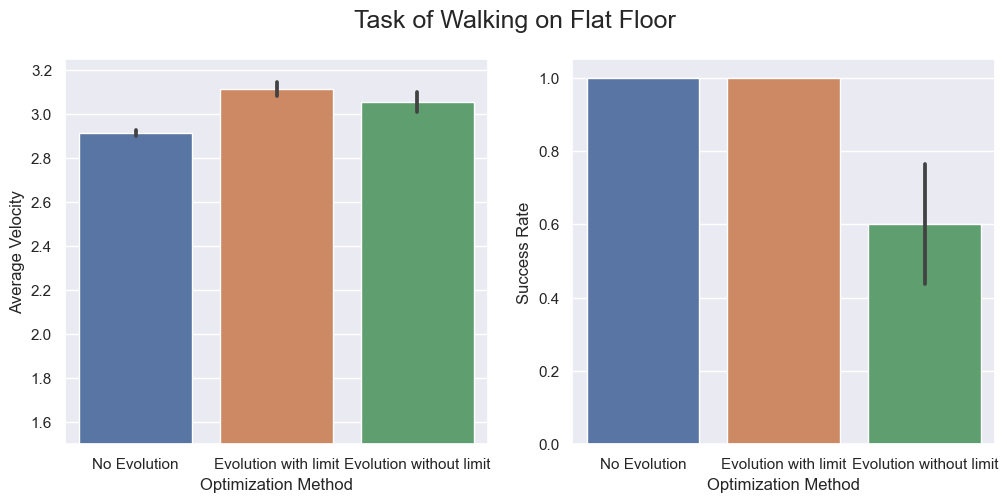

In [31]:
exp_data = pd.read_csv('experiments\\flat_floor_evo_s3\\exp.csv')
#exp_data.head()
#task = exp_data["Task"][:]
f = plt.figure(1,figsize=(12, 5))
f.suptitle('Task of Walking on Flat Floor',fontsize=18)
plt.subplot(1,2,1)
ax = sns.barplot(x="Optimization Method", y="Ave_V", data=exp_data,errorbar="se") #standard error
plt.ylabel('Average Velocity')
plt.ylim([1.5,3.25])
plt.subplot(1,2,2)
sns.barplot(x="Optimization Method", y="Success", data=exp_data,errorbar="se") #standard error
plt.ylabel('Success Rate')
plt.savefig(f'screenshot/flatfloor_EVO_barplot.png', dpi=400)
plt.show()

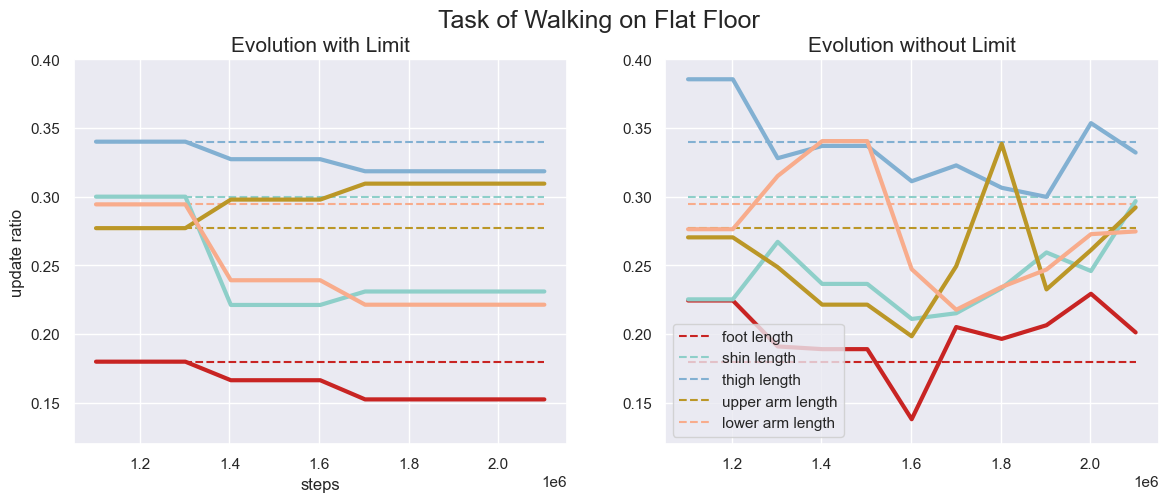

In [24]:
evo_punish_foot = "experiments\\flat_floor_evo_s3\\data\\param\\run-flatfloor_evo_punish_s3_0-tag-design_foot_lenth.csv"
evo_punish_shin = "experiments\\flat_floor_evo_s3\\data\\param\\run-flatfloor_evo_punish_s3_0-tag-design_shin_lenth.csv"
evo_punish_thigh = "experiments\\flat_floor_evo_s3\\data\\param\\run-flatfloor_evo_punish_s3_0-tag-design_thigh_lenth.csv"
evo_punish_upper_arm = "experiments\\flat_floor_evo_s3\\data\\param\\run-flatfloor_evo_punish_s3_0-tag-design_upper_arm_lenth.csv"
evo_punish_lower_arm = "experiments\\flat_floor_evo_s3\\data\\param\\run-flatfloor_evo_punish_s3_0-tag-design_lower_arm_lenth.csv"

evo_foot = "experiments\\flat_floor_evo_s3\\data\\param\\run-flatfloor_evo_s3_0-tag-design_foot_lenth.csv"
evo_shin = "experiments\\flat_floor_evo_s3\\data\\param\\run-flatfloor_evo_s3_0-tag-design_shin_lenth.csv"
evo_thigh = "experiments\\flat_floor_evo_s3\\data\\param\\run-flatfloor_evo_s3_0-tag-design_thigh_lenth.csv"
evo_upper_arm = "experiments\\flat_floor_evo_s3\\data\\param\\run-flatfloor_evo_s3_0-tag-design_upper_arm_lenth.csv"
evo_lower_arm = "experiments\\flat_floor_evo_s3\\data\\param\\run-flatfloor_evo_s3_0-tag-design_lower_arm_lenth.csv"


evo_punish_foot_data = pd.read_csv(evo_punish_foot)
evo_punish_shin_data = pd.read_csv(evo_punish_shin)
evo_punish_thigh_data = pd.read_csv(evo_punish_thigh)
evo_punish_upper_arm_data = pd.read_csv(evo_punish_upper_arm)
evo_punish_lower_arm_data = pd.read_csv(evo_punish_lower_arm)

evo_foot_data = pd.read_csv(evo_foot)
evo_shin_data = pd.read_csv(evo_shin)
evo_thigh_data = pd.read_csv(evo_thigh)
evo_upper_arm_data = pd.read_csv(evo_upper_arm)
evo_lower_arm_data = pd.read_csv(evo_lower_arm)

smooth_num = 15




evo_punish_steps = np.array(evo_punish_foot_data["Step"][:])
#f1_rewards = np.array(normal_reward_data["Value"][:])
#f2_rewards = np.array(no_postureR_reward_data["Value"][:])
#f3_rewards = np.array(no_terrain_info_reward_data["Value"][:])

f = plt.figure(1,figsize=(14, 5))
f.suptitle('Task of Walking on Flat Floor',fontsize=18)
plt.subplot(1,2,1)

linestyle=':'
foot_ori = [0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18]
shin_ori = [0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]
thigh_ori = [0.34,0.34,0.34,0.34,0.34,0.34,0.34,0.34,0.34,0.34,0.34]
upper_arm_ori = [0.2771,0.2771,0.2771,0.2771,0.2771,0.2771,0.2771,0.2771,0.2771,0.2771,0.2771,]
lower_arm_ori = [0.2944,0.2944,0.2944,0.2944,0.2944,0.2944,0.2944,0.2944,0.2944,0.2944,0.2944,]

plt.plot(evo_punish_steps, foot_ori,linestyle='--',color='#C82423',linewidth = 1.5)
plt.plot(evo_punish_steps, shin_ori,linestyle='--',color='#8ECFC9',linewidth = 1.5)
plt.plot(evo_punish_steps, thigh_ori,linestyle='--',color='#82B0D2',linewidth = 1.5)
plt.plot(evo_punish_steps, upper_arm_ori,linestyle='--',color='#BB9727',linewidth = 1.5)
plt.plot(evo_punish_steps, lower_arm_ori,linestyle='--',color='#F8AC8C',linewidth = 1.5)

plt.plot(evo_punish_steps, evo_punish_foot_data["Value"][:],color='#C82423',linewidth = 3)
plt.plot(evo_punish_steps, evo_punish_shin_data["Value"][:],color='#8ECFC9',linewidth = 3)
plt.plot(evo_punish_steps, evo_punish_thigh_data["Value"][:],color='#82B0D2',linewidth = 3)
plt.plot(evo_punish_steps, evo_punish_upper_arm_data["Value"][:],color='#BB9727',linewidth = 3)
plt.plot(evo_punish_steps, evo_punish_lower_arm_data["Value"][:],color='#F8AC8C',linewidth = 3)
plt.ylim([0.12,0.40])
plt.title("Evolution with Limit",fontsize=15)
plt.xlabel('steps')
plt.ylabel('update ratio')
#plt.legend(["foot length","shin length","thigh length", "upper arm length", "lower arm length"],loc="lower left")

'''
f1_steps = np.array(normal_eplen_data["Step"][:])
f2_steps = np.array(no_postureR_eplen_data["Step"][:])
f3_steps = np.array(no_terrain_info_eplen_data["Step"][:])
f1_eplen = np.array(normal_eplen_data["Value"][:])
f2_eplen = np.array(no_postureR_eplen_data["Value"][:])
f3_eplen = np.array(no_terrain_info_eplen_data["Value"][:])
'''
evo_steps = np.array(evo_foot_data["Step"][:])
plt.subplot(1,2,2)


plt.plot(evo_punish_steps, foot_ori,linestyle='--',color='#C82423',linewidth = 1.5)
plt.plot(evo_punish_steps, shin_ori,linestyle='--',color='#8ECFC9',linewidth = 1.5)
plt.plot(evo_punish_steps, thigh_ori,linestyle='--',color='#82B0D2',linewidth = 1.5)
plt.plot(evo_punish_steps, upper_arm_ori,linestyle='--',color='#BB9727',linewidth = 1.5)
plt.plot(evo_punish_steps, lower_arm_ori,linestyle='--',color='#F8AC8C',linewidth = 1.5)


plt.plot(evo_steps, evo_foot_data["Value"][:],color='#C82423',linewidth = 3)
plt.plot(evo_steps, evo_shin_data["Value"][:],color='#8ECFC9',linewidth = 3)
plt.plot(evo_steps, evo_thigh_data["Value"][:],color='#82B0D2',linewidth = 3)
plt.plot(evo_steps, evo_upper_arm_data["Value"][:],color='#BB9727',linewidth = 3)
plt.plot(evo_steps, evo_lower_arm_data["Value"][:],color='#F8AC8C',linewidth = 3)
plt.ylim([0.12,0.40])
#plt.legend(["foot length","shin length","thigh length", "upper arm length", "lower arm length"])
plt.legend(["foot length","shin length","thigh length", "upper arm length", "lower arm length"],loc="lower left")
plt.title("Evolution without Limit",fontsize=15)
#plt.legend(["Proposed model","Proposed model without posture reward","Proposed model without terrain info"])

plt.savefig(f'screenshot/flatfloor_EVO_design_params.png', dpi=400)
plt.show()